In [3]:
!pip install requests

In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
CITIES = [ 
    "New York", "London", "Tokyo", "Mumbai", "Sydney", "Paris", "Berlin", "Dubai",
    "Singapore", "Los Angeles", "Toronto", "Hong Kong", "Chicago", "Shanghai", "Moscow",
    "São Paulo", "Seoul", "Bangkok", "Jakarta", "Mexico City", "Istanbul", "Delhi",
    "Rome", "Barcelona", "San Francisco", "Kuala Lumpur", "Buenos Aires", "Beijing",
    "Cairo", "Cape Town", "Madrid", "Vienna", "Amsterdam", "Zurich", "Brussels",
    "Lagos", "Manila", "Stockholm", "Rio de Janeiro", "Bogotá", "Johannesburg",
    "Hanoi", "Warsaw", "Munich", "Dublin", "Prague", "Osaka", "Melbourne", "Lisbon"
]

In [9]:
def get_lat_lon(city):
    geo_url = f"https://geocoding-api.open-meteo.com/v1/search?name={city}&count=1"
    response = requests.get(geo_url)
    
    if response.status_code == 200 and response.json().get("results"):
        location = response.json()["results"][0]
        return location["latitude"], location["longitude"]
    
    print(f"Could not find coordinates for {city}")
    return None, None

In [10]:
def get_weather_data(city):
    lat, lon = get_lat_lon(city)
    if lat is None or lon is None:
        return None

    weather_url = f"https://api.open-meteo.com/v1/forecast?latitude={lat}&longitude={lon}&current_weather=true"
    response = requests.get(weather_url)

    if response.status_code == 200:
        data = response.json()
        return {
            "City": city,
            "Temperature": data["current_weather"]["temperature"]
        }
    
    print(f"Failed to get data for {city}")
    return None

In [11]:
data_list = [get_weather_data(city) for city in CITIES]
data_list = [data for data in data_list if data]

In [15]:
df = pd.DataFrame(data_list)
print(df)

              City  Temperature
0         New York         -6.8
1           London         12.4
2            Tokyo          2.2
3           Mumbai         29.2
4           Sydney         19.2
5            Paris         12.2
6           Berlin          1.5
7            Dubai         25.7
8        Singapore         27.2
9      Los Angeles         10.3
10         Toronto        -12.8
11       Hong Kong         17.0
12         Chicago        -15.5
13        Shanghai          5.3
14          Moscow         -6.1
15       São Paulo         28.1
16           Seoul         -5.2
17         Bangkok         29.1
18         Jakarta         27.3
19     Mexico City         12.1
20        Istanbul          2.9
21           Delhi         19.6
22            Rome         12.8
23       Barcelona         13.8
24   San Francisco          8.2
25    Kuala Lumpur         27.8
26    Buenos Aires         25.9
27         Beijing          0.8
28           Cairo         20.1
29       Cape Town         31.1
30      

In [16]:
top_10_hottest = df.nlargest(10, "Temperature")
top_10_coldest = df.nsmallest(10, "Temperature")

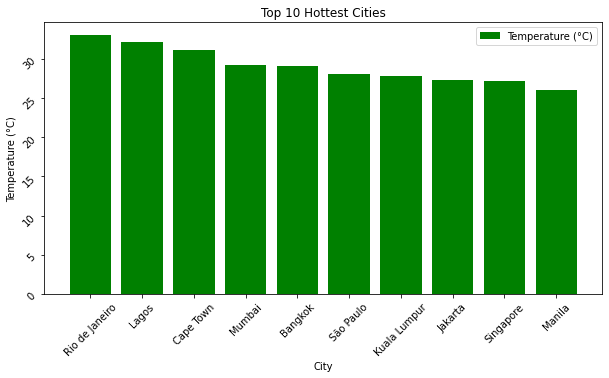

In [21]:
plt.figure(figsize=(10, 5))
plt.bar(top_10_hottest["City"], top_10_hottest["Temperature"],color='g',label='Temperature (°C)')
plt.xlabel("City")
plt.yticks(rotation=45)
plt.xticks(rotation=45)
plt.ylabel("Temperature (°C)")
plt.title("Top 10 Hottest Cities")
plt.legend()
plt.show()

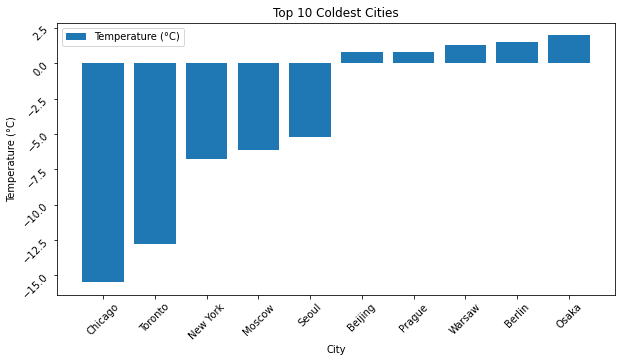

In [22]:
plt.figure(figsize=(10, 5))
plt.bar(top_10_coldest["City"], top_10_coldest["Temperature"], label='Temperature (°C)')
plt.xlabel("City")
plt.yticks(rotation=45)
plt.xticks(rotation=45)
plt.ylabel("Temperature (°C)")
plt.title("Top 10 Coldest Cities")
plt.legend()
plt.show()


In [23]:
hottest_city = df.loc[df["Temperature"].idxmax()]
coldest_city = df.loc[df["Temperature"].idxmin()]

In [24]:
print(f"Hottest City: {hottest_city['City']} ({hottest_city['Temperature']}°C)")
print(f"Coldest City: {coldest_city['City']} ({coldest_city['Temperature']}°C)")

Hottest City: Rio de Janeiro (33.0°C)
Coldest City: Chicago (-15.5°C)
